<a href="https://colab.research.google.com/github/defritonc1/cleanflight/blob/master/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import tensorflow

import tensorflow as tf
print(tf.__version__)

2.9.2


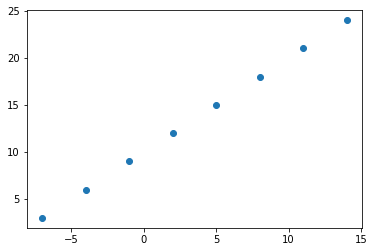

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0 ])

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0 ])

plt.scatter(X,y)




In [ ]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [ ]:
y == X + 10


array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
# Turn our numpy arrays into tensorsolve

X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

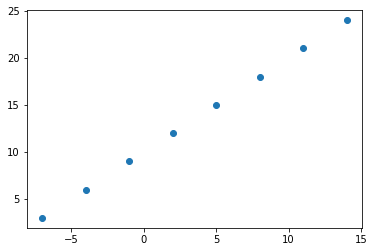

In [ ]:
plt.scatter(X,y)


In [ ]:
# Steps in modelling with Tensorflow



1. Creating a model - define the input and output layers

2. Compiling a Model - define the loss function

3. Fitting the Model - letting the model try to find patterns

In [ ]:
#Set random seed
tf.random.set_seed(42)

# 1. Create a model using the sequention API
model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(1)
])

# 2. Compile 
model.compile(loss=tf.keras.losses.mae, #mae = mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd = stocastic gradient
             metrics=["mae"])

# 3. Fit 

model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 19ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 26ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 27ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# make a prediction

y_pred = model.predict([17.0])
y_pred


1/1 [==============================] - 0s 196ms/step


array([[12.716021]], dtype=float32)

In [ ]:
#Set random seed
tf.random.set_seed(42)

# 1. Create a model using the sequention API
model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(1)
])

# 2. Compile 
model.compile(loss=tf.keras.losses.mae, #mae = mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd = stocastic gradient
             metrics=["mae"])

# 3. Fit 

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 800ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 25ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 25ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 28ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 23ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 30ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================]

In [ ]:
# Remind ourselves of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
model.predict([14.2])

1/1 [==============================] - 0s 480ms/step


array([[25.328342]], dtype=float32)

In [ ]:

# 1. Create a model using the sequention API
# Learning rate is one of the most important hyper parameter
model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(50, activation= None),
    tf.keras.layers.Dense(1)
])

# 2. Compile 
model.compile(loss=tf.keras.losses.mae, #mae = mean absolute error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # sgd = stocastic gradient
             metrics=["mae"])

# 3. Fit 

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 14.6466 - mae: 14.6466
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 13.9532 - mae: 13.9532
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 13.2603 - mae: 13.2603
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 12.5659 - mae: 12.5659
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 11.8675 - mae: 11.8675
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 11.1621 - mae: 11.1621
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 10.4475 - mae: 10.4475
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 9.7214 - mae: 9.7214
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 8.9817 - mae: 8.9817
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 8.2262 - mae: 8.2262
Epoch 11/100
1/1 [==============================] - 0s 32

In [ ]:
X2 = tf.expand_dims(X, axis=-1)
X2, X

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>)

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 91ms/step


array([[26.434408]], dtype=float32)

When it comes to evaluation  ....

Visualize, Visualize, visualize

It is a good idea to visualize:
  The Data
  The Model itself
  The training model
  The prediction of the model


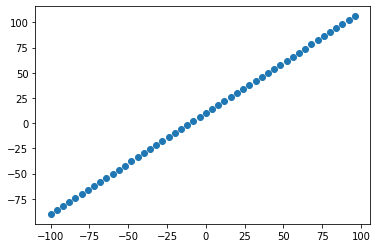

In [ ]:
X = tf.range(-100, 100, 4)

y = X + 10

X, y

plt.scatter(X,y)
# plt.plot(X,y)

In [ ]:
X, y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
#### The 3 Sets... Split the data into train and test sets
len(X),len(y)

X_train = X[:40] # The first 40 are training samples
y_train = y[:40] # The first 40 are training samples

X_test = X[40:] # last 10 are testing samples
y_test = y[40:] # last 10 are testing samples



Visualize the Data

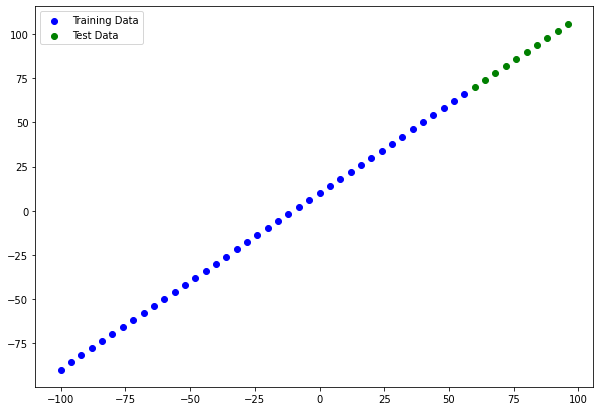

In [ ]:
# Visualizing the data

plt.figure(figsize=(10,7))

plt.scatter(X_train, y_train, c="b", label = "Training Data")
plt.scatter(X_test,y_test, c='g', label = "Test Data")
plt.legend();

In [ ]:
# Builod the neural network
tf.random.set_seed(42)
# 1. Create a model using the sequention API
model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(10, input_shape=[1], name = "input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")

], name = "Model_oneofMany")

# 2. Compile 
model.compile(loss=tf.keras.losses.mae, #mae = mean absolute error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # sgd = stocastic gradient
             metrics=["mae"])

# 3. Fit 

model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [ ]:
model.summary()

Model: "Model_oneofMany"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


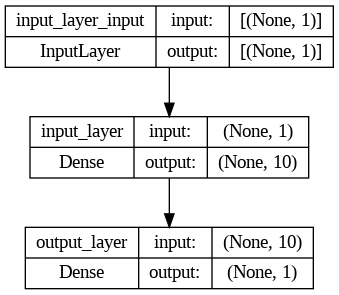

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes=True)

In [ ]:
# make some preds

y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 84ms/step


array([[ 72.42796 ],
       [ 76.58641 ],
       [ 80.74484 ],
       [ 84.90328 ],
       [ 89.06172 ],
       [ 93.22017 ],
       [ 97.37861 ],
       [101.53704 ],
       [105.69549 ],
       [109.853935]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  
  plt.figure(figsize=(20,14))
  # Plot traning data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot traning data in blue
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot traning data in blue
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  #Show the legend
  plt.legend();
  


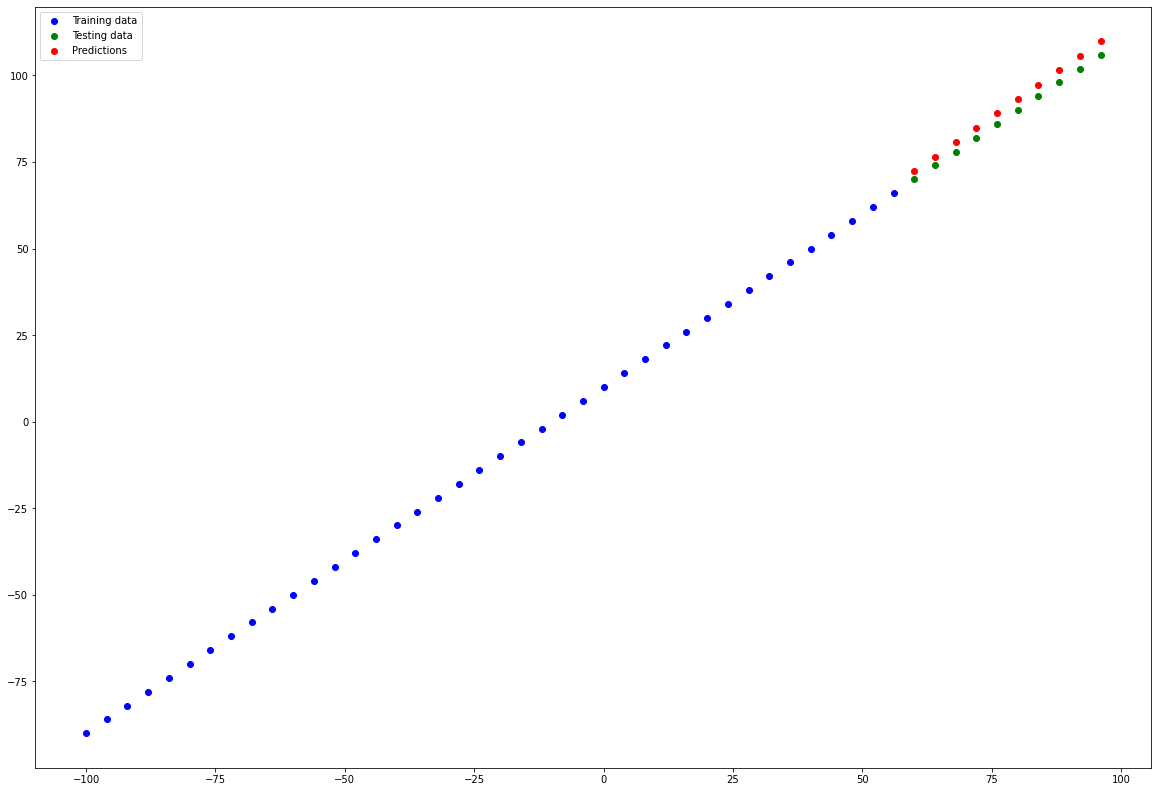

In [ ]:
plot_predictions()


In [ ]:
tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([16.057629 , 13.248154 , 11.302063 , 10.219343 , 10.       ,
       10.644033 , 12.1514435, 14.522224 , 17.75639  , 21.853935 ],
      dtype=float32)>

In [ ]:
y_pred

array([[ 72.42796 ],
       [ 76.58641 ],
       [ 80.74484 ],
       [ 84.90328 ],
       [ 89.06172 ],
       [ 93.22017 ],
       [ 97.37861 ],
       [101.53704 ],
       [105.69549 ],
       [109.853935]], dtype=float32)

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 72.42796 ,  76.58641 ,  80.74484 ,  84.90328 ,  89.06172 ,
        93.22017 ,  97.37861 , 101.53704 , 105.69549 , 109.853935],
      dtype=float32)>

In [ ]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1409461>

In [ ]:
#tf.expand_dims(y_test, axis=-1)

In [ ]:
mse = tf.metrics.mean_squared_error(y_true=y_test,y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=10.072645>

In [ ]:
y_test.ndim, y_pred.ndim

(1, 2)

In [ ]:
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))
  

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
# Builod the neural network
tf.random.set_seed(42)
# 1. Create a model using the sequention API
model1_1 = tf.keras.Sequential([ 
    tf.keras.layers.Dense(1)

])

# 2. Compile 
model1_1.compile(loss=tf.keras.losses.mae, #mae = mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd = stocastic gradient
             metrics=["mae"])

# 3. Fit 

model1_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 8ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 32ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 24ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 27ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 22ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 11ms/

1/1 [==============================] - 0s 25ms/step


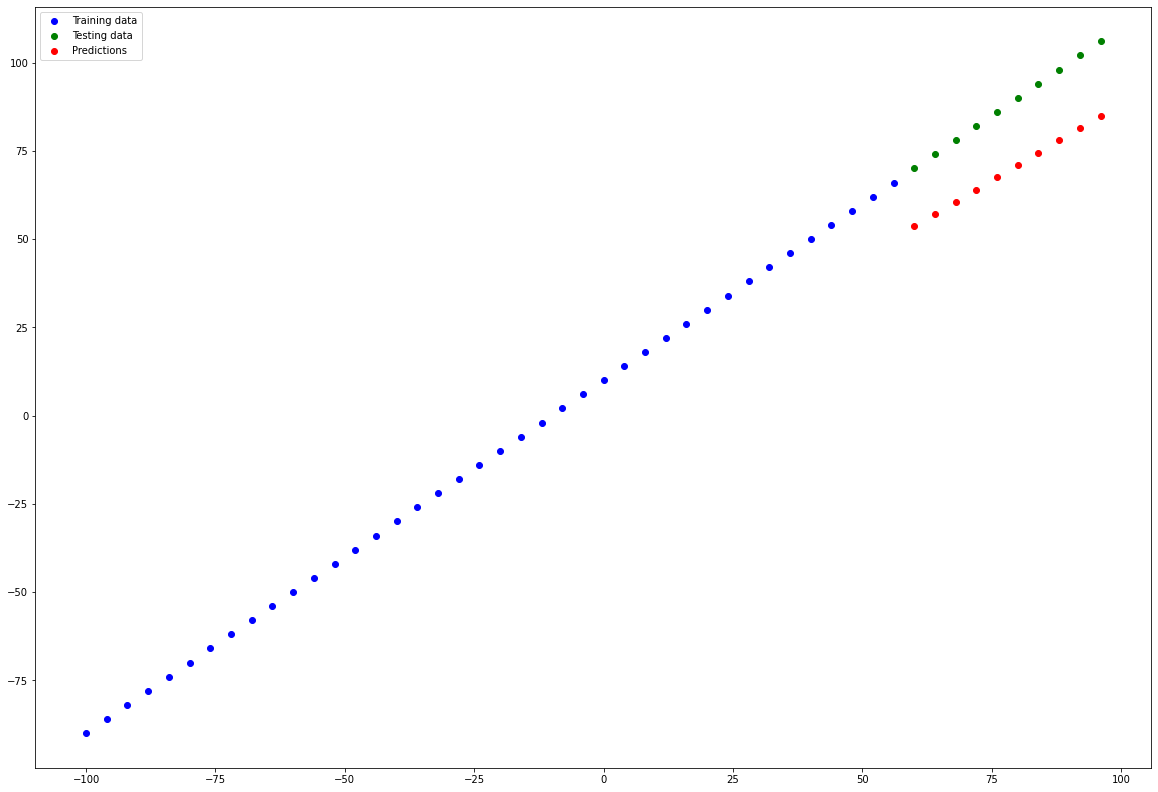

In [ ]:
y_preds_1 = model1_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
#Calculate model_1 evaluation metrics
mae_1 = mae(y_test,y_preds_1)
mse_1 = mse(y_test,y_preds_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

In [ ]:
# Builod the neural network
tf.random.set_seed(42)
# 1. Create a model using the sequention API
model1_2 = tf.keras.Sequential([ 
    tf.keras.layers.Dense(20, input_shape=[1], name = "input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")

], name = "Model_oneofMany")

# 2. Compile 
model1_2.compile(loss=tf.keras.losses.mae, #mae = mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd = stocastic gradient
              metrics=["mae"])

# 3. Fit 

model1_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=80, verbose=0)




1/1 [==============================] - 0s 43ms/step


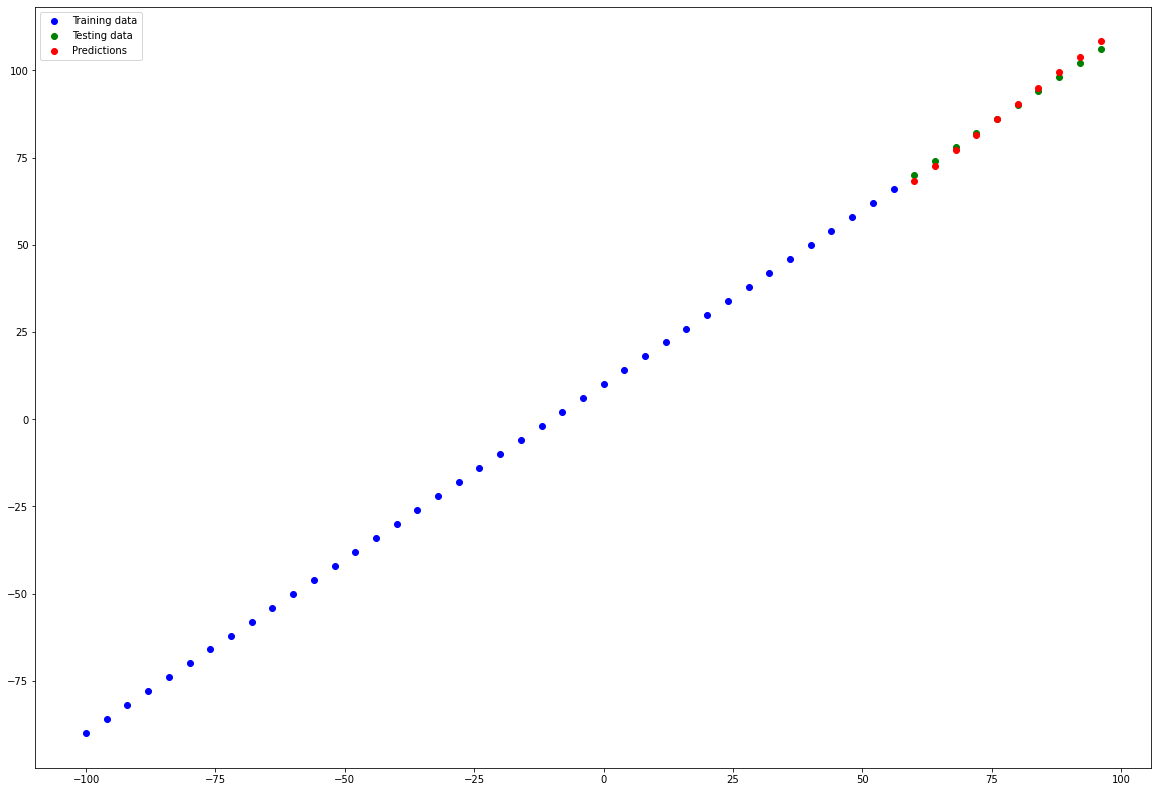

In [ ]:
y_preds_2 = model1_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
mae_2 = mae(y_test,y_preds_2)
mse_2 = mse(y_test,y_preds_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=1.1471474>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.7855154>)

In [ ]:
# Builod the neural network
tf.random.set_seed(42)
# 1. Create a model using the sequention API
model1_3 = tf.keras.Sequential([ 
    tf.keras.layers.Dense(1, input_shape=[1], name = "input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")

], name = "Model_oneofMany")

# 2. Compile 
model1_3.compile(loss=tf.keras.losses.mae, #mae = mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd = stocastic gradient
              metrics=["mae"])

# 3. Fit 

model1_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)




1/1 [==============================] - 0s 26ms/step


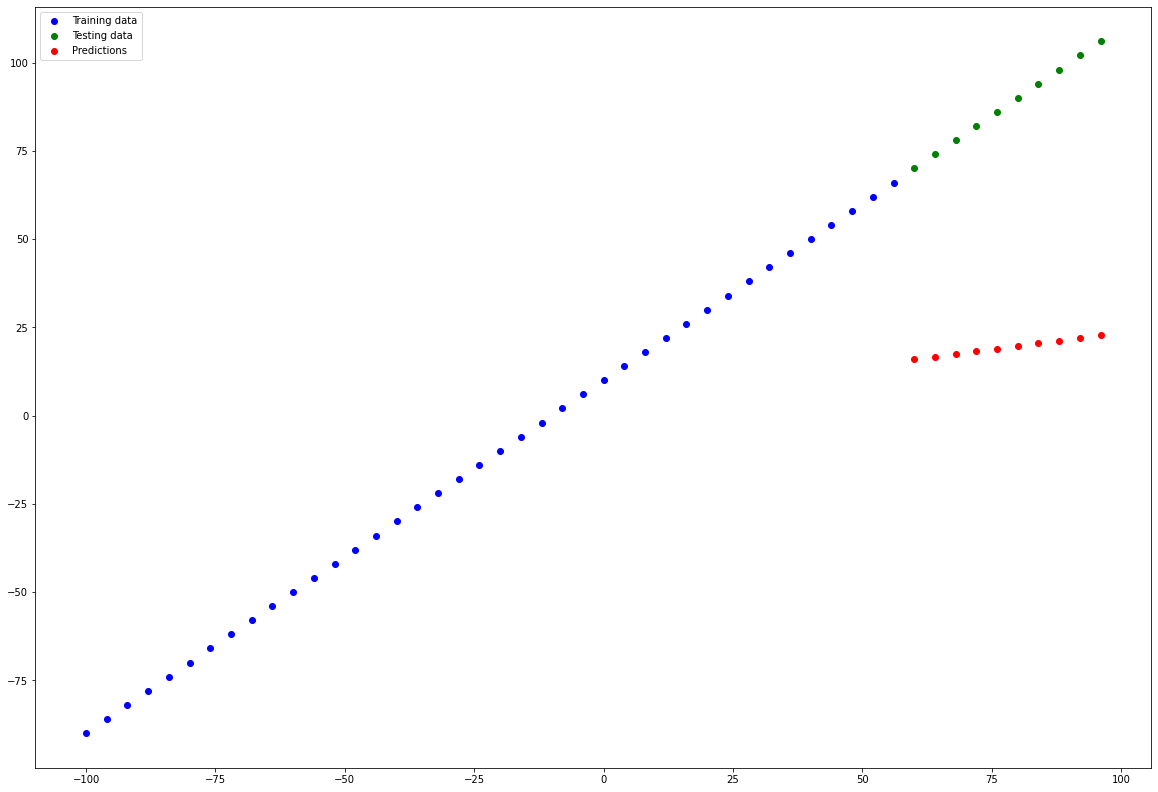

In [ ]:
y_preds_3 = model1_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
mae_3 = mae(y_test,y_preds_3)
mse_3 = mse(y_test,y_preds_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.68784>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4804.469>)

** Note ** You want to start small experiments and add complexity when needed.

In [ ]:
# Lets compare our resutls using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,1.147147,1.785515
2,model_3,68.687843,4804.469238


In [ ]:
model1_2.summary()

Model: "Model_oneofMany"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 20)                40        
                                                                 
 output_layer (Dense)        (None, 1)                 21        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Saving our models....
#
# there are 2 main formats
#
# 1. The SavedModel format
# 2. the HDF5 format
# @ first save as the SavedModel format
model1_2.save("best-Model_SavedModel_format")




In [ ]:
# @ first save as the HDF5 format
model1_2.save("best-Model_SavedModel_format.h5")

In [ ]:
# Load in thew SavedModel foemat

loaded_savedModel_format = tf.keras.models.load_model("best-Model_SavedModel_format")

In [ ]:
model1_2.summary()

Model: "Model_oneofMany"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 20)                40        
                                                                 
 output_layer (Dense)        (None, 1)                 21        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare our loaded model to the original

model_2_preds = model1_2.predict(X_test)
loaded_savedModel_format_preds = loaded_savedModel_format.predict(X_test)
model_2_preds == loaded_savedModel_format_preds

1/1 [==============================] - 0s 18ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
from google.colab import files
files.download("best-Model_SavedModel_format.h5")

A larger Example

In [ ]:
# Kaggle

# Import 

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Design a model
insurance["smoker"]

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [ ]:
insurance_one_hot = pd.get_dummies(insurance)

insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
